<a href="https://colab.research.google.com/github/kiminlim/ds-section1-sprint1/blob/master/n113-data-manipulation/n113a_data_manipulation_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [54]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf 
#  위에거 코드돌리고 런타임 재시작후 한버더 돌린다음 import matplotlib.pyplot as plt


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [55]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [56]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 


In [57]:
df1

,Unnamed: 0,2019/09\n(IFRS연결),2019/12\n(IFRS연결),2020/03\n(IFRS연결),2020/06\n(IFRS연결),2020/09\n(IFRS연결)
0,매출액,"5,291","5,586","5,339","5,816","6,243"
1,영업이익,492,327,561,541,644
2,영업이익(발표기준),492,327,561,541,644
3,세전계속사업이익,348,39,450,487,465
4,당기순이익,258,-252,334,349,322
5,당기순이익(지배),259,-251,334,349,323
6,당기순이익(비지배),0,0,0,0,0
7,자산총계,"34,061","32,709","36,368","43,007","39,617"
8,부채총계,"23,056","22,377","26,164","32,393","28,720"
9,자본총계,"11,005","10,332","10,204","10,613","10,897"


In [58]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 

    # 조건
    # df = df.loc[5, ['매출액','자본총계','EPS(원)']]
    return df

In [59]:
df1 = mydf('000080.csv')
df1

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [60]:
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [61]:
df1 = df1.loc['2020/09\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]
df1

Unnamed: 0
매출액        6,243
자산총계      39,617
EPS(원)       453
Name: 2020/09\n(IFRS연결), dtype: object

In [62]:
df2 = df2.loc['2020/09\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]
df3 = df3.loc['2020/09\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]
df4 = df4.loc['2020/09\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]
df5 = df5.loc['2020/06\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]
df6 = df6.loc['2020/09\n(IFRS연결)', ['매출액', '자산총계','EPS(원)']]

In [63]:
df1

Unnamed: 0
매출액        6,243
자산총계      39,617
EPS(원)       453
Name: 2020/09\n(IFRS연결), dtype: object

In [64]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis = 1)
# df.shape

In [65]:
df = df.transpose()
df

Unnamed: 0,매출액,자산총계,EPS(원)
2020/09\n(IFRS연결),"6,243","39,617",453
2020/09\n(IFRS연결),205,"1,555",3
2020/09\n(IFRS연결),"5,980","34,066","1,682"
2020/09\n(IFRS연결),521,"1,897",-61
2020/06\n(IFRS연결),"4,108","18,966","1,168"
2020/09\n(IFRS연결),"2,613","8,550",62


In [66]:
df['종목명'] =  ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']
df

Unnamed: 0,매출액,자산총계,EPS(원),종목명
2020/09\n(IFRS연결),"6,243","39,617",453,하이트진로
2020/09\n(IFRS연결),205,"1,555",3,보해양조
2020/09\n(IFRS연결),"5,980","34,066","1,682",롯데칠성
2020/09\n(IFRS연결),521,"1,897",-61,마니커
2020/06\n(IFRS연결),"4,108","18,966","1,168",이지홀딩스
2020/09\n(IFRS연결),"2,613","8,550",62,하림


In [67]:
def toInt(string):
    return int(string.replace(',',''))

df['매출액'] = df['매출액'].apply(toInt)
df['자산총계'] = df['자산총계'].apply(toInt)
df['EPS(원)'] = df['EPS(원)'].apply(toInt)

In [68]:
df.shape

(6, 4)

## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [70]:
df.columns

Index(['매출액', '자산총계', 'EPS(원)', '종목명'], dtype='object', name='Unnamed: 0')

In [71]:
# df_tidy = df.melt(id_vars='종목명', value_vars=['매출액', '자산총계', 'EPS(원)'])
# df_tidy

In [72]:
df_tidy =  df.melt(id_vars='종목명', var_name='Feature',value_name='Value')

df_tidy

,종목명,Feature,Value
0,하이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,하이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


In [73]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   종목명      18 non-null     object
 1   Feature  18 non-null     object
 2   Value    18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


In [74]:
# 숫자형이 아니어서 에러남.

# df_tidy['value'].astype(float) # 문자열이라 에러남

# df_tidy['value'] = df_tidy['value'].apply(toInt)

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

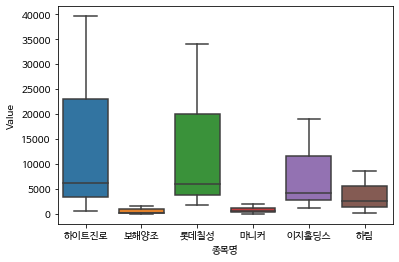

In [76]:
# import seaborn as sns

res = sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');
res;

In [77]:
# 박스의 수는 6개이다
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [78]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [79]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [80]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [81]:
# merge는 concat과 다르게 공통된 부분을 기반으로 합치기가 주요 용도입니다.
# df.merge("붙일 내용", how = "(방법)", on ="(기준 feature)")
df2  = left.merge(right, how = 'left', on = ['key1', 'key2'] ) #* 노가다로 나오긴 했는데 완전히 이해는 안간다. *
df2


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [82]:
import numpy as np


In [83]:
df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))

True

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [84]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6)
  score += (round(df_tidy['Value'].mean(), 3) == 7090.444)
  return(score)

In [85]:
grade(df, df2, df_tidy, res)

5

In [86]:
df['매출액'][2]

5980

In [87]:
df['자산총계'][3]

1897

In [88]:
res

6

In [89]:
int(df_tidy['Value'].mean())

7090

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df = pd.read_excel('/content/drive/MyDrive/코드스테이츠(ai 캠프)/[S1] EDA/[n11x]EDA/n11x_data & ipynb/n113.xlsx')

In [92]:
df

,종목명,매출액,자본총계,EPS
0,대한해운,2222,8533,23
1,팬오션,6205,28067,-26
2,KSS해운,546,2689,-237
3,세미콘라이트,66,470,-363
4,오성첨단소재,184,1944,8
5,에이아이비트,57,453,-187


In [93]:
df['테마'] = ['해운','해운','해운','대마','대마','대마']

In [94]:
df

,종목명,매출액,자본총계,EPS,테마
0,대한해운,2222,8533,23,해운
1,팬오션,6205,28067,-26,해운
2,KSS해운,546,2689,-237,해운
3,세미콘라이트,66,470,-363,대마
4,오성첨단소재,184,1944,8,대마
5,에이아이비트,57,453,-187,대마


In [95]:
# 테마별
df[df['테마'] == '해운'].mean()

매출액      2991.000000
자본총계    13096.333333
EPS       -80.000000
dtype: float64

In [96]:
df[df['테마'] == '대마'].mean()

매출액     102.333333
자본총계    955.666667
EPS    -180.666667
dtype: float64

In [97]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [98]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

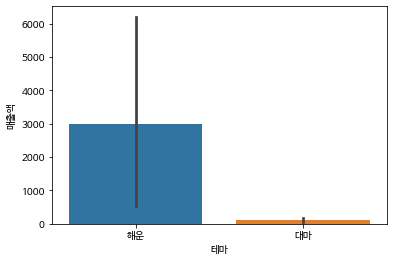

In [105]:
# 매출액 barplot # 
sns.barplot(data = df, x = df['테마'], y = df['매출액'])

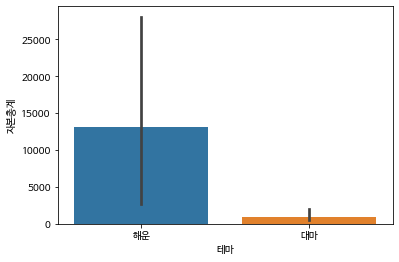

In [100]:
# 자본총계 barplot # 
sns.barplot(data = df, x = df['테마'], y = df['자본총계'])

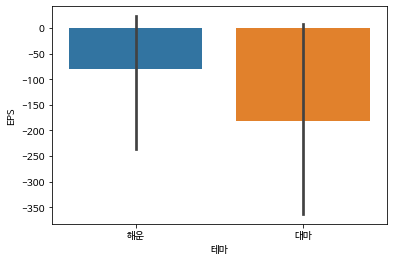

In [101]:
# EPS barplot # 
sns.barplot(data = df, x = df['테마'], y = df['EPS'])


In [102]:
# import pandas as pd
# import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

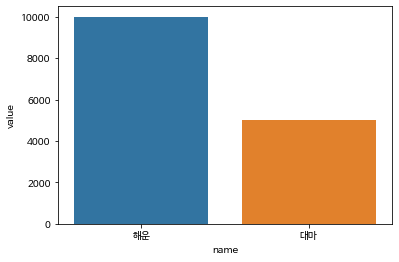

In [103]:
sns.barplot(x = 'name', y = 'value', data = dat);